In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # Mac의 경우
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=font_prop.get_name())

In [16]:
import pandas as pd

life = pd.read_csv('../data/Consumer_Life.csv')

# 2021 & 2023 컬럼만 자동 추출
life_cols = ['행정구역별(1)', '특성별(1)', '특성별(2)'] + \
            [c for c in life.columns if c.startswith('2021')] + \
            [c for c in life.columns if c.startswith('2023')]

life_21_23 = life[life_cols]

life_21_23.head()


,행정구역별(1),특성별(1),특성별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,행정구역별(1),특성별(1),특성별(2),계,매우 만족,약간 만족,보통,약간 불만족,매우 불만족,계,매우 만족,약간 만족,보통,약간 불만족,매우 불만족
1,전국,전체,계,100.0,3.3,15.4,48.5,25.1,7.8,100.0,3.3,17.9,49.9,22.1,6.8
2,전국,성별,남자,100.0,3.2,15.2,49.0,24.4,8.2,100.0,3.1,18.0,51.2,20.8,6.9
3,전국,성별,여자,100.0,3.4,15.5,47.9,25.9,7.4,100.0,3.4,17.8,48.6,23.3,6.8
4,서울특별시,전체,계,100.0,4.1,16.4,45.8,25.0,8.7,100.0,3.4,20.1,48.9,20.4,7.1


In [18]:
income_satis = pd.read_csv('../data/income_satisfaction.csv')

income_cols = ['행정구역별(1)', '특성별(1)', '특성별(2)'] + \
              [c for c in income_satis.columns if c.startswith('2021')] + \
              [c for c in income_satis.columns if c.startswith('2023')]

income_21_23 = income_satis[income_cols]

income_21_23.head()


,행정구역별(1),특성별(1),특성별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6
0,행정구역별(1),특성별(1),특성별(2),계,소득 있음,- 매우 만족,- 약간 만족,- 보통,- 약간 불만족,- 매우 불만족,계,소득 있음,- 매우 만족,- 약간 만족,- 보통,- 약간 불만족,- 매우 불만족
1,전국,전체,계,100.0,83.9,3.0,20.4,34.3,27.7,14.5,100.0,78.2,3.2,24.9,32.0,25.6,14.2
2,전국,성별,남자,100.0,90.7,2.9,20.5,33.1,28.3,15.2,100.0,86.1,3.0,25.6,31.9,25.5,14.1
3,전국,성별,여자,100.0,77.3,3.2,20.4,35.6,27.0,13.8,100.0,70.5,3.5,24.2,32.3,25.8,14.3
4,서울특별시,전체,계,100.0,85.8,3.3,19.1,33.1,29.0,15.5,100.0,80.1,3.3,25.7,30.1,26.4,14.6


In [19]:
personal = pd.read_csv('../data/personal_income.csv')

# 연도 형태만 추출 (2021, 2022, 2023 포함)
year_cols = ['시도별'] + [c for c in personal.columns if c.startswith(('2021', '2022', '2023'))]

personal_21_23 = personal[year_cols]

personal_21_23.head()


,시도별,2021,2022,2023 p)
0,전국,43415,45588,47306
1,서울특별시,59498,63778,65994
2,부산광역시,32832,34263,35373
3,대구광역시,31558,34000,34344
4,인천광역시,37828,39748,41203


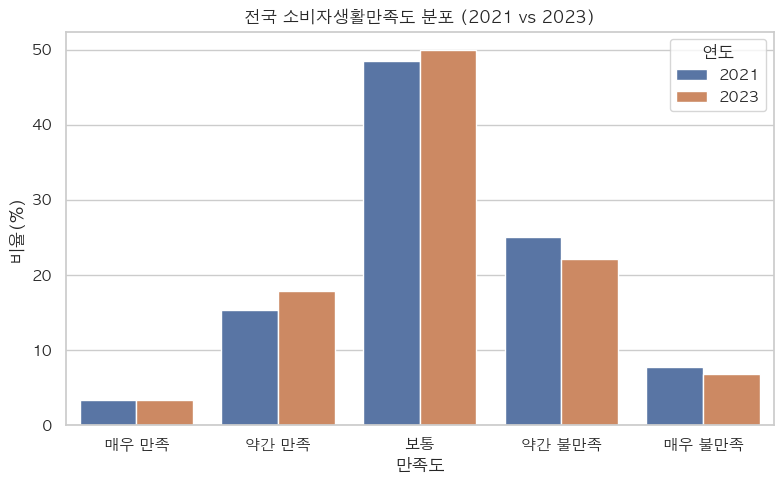

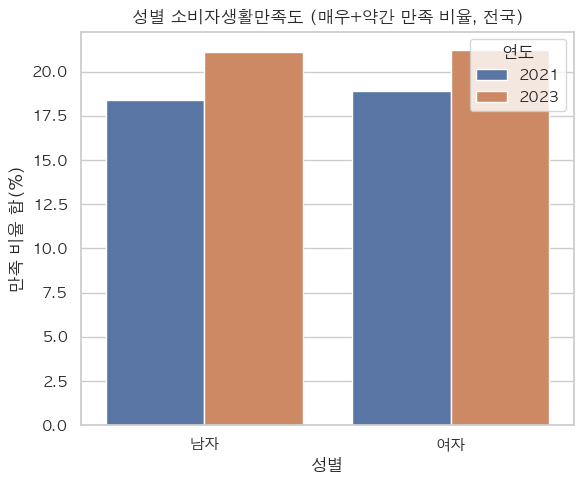

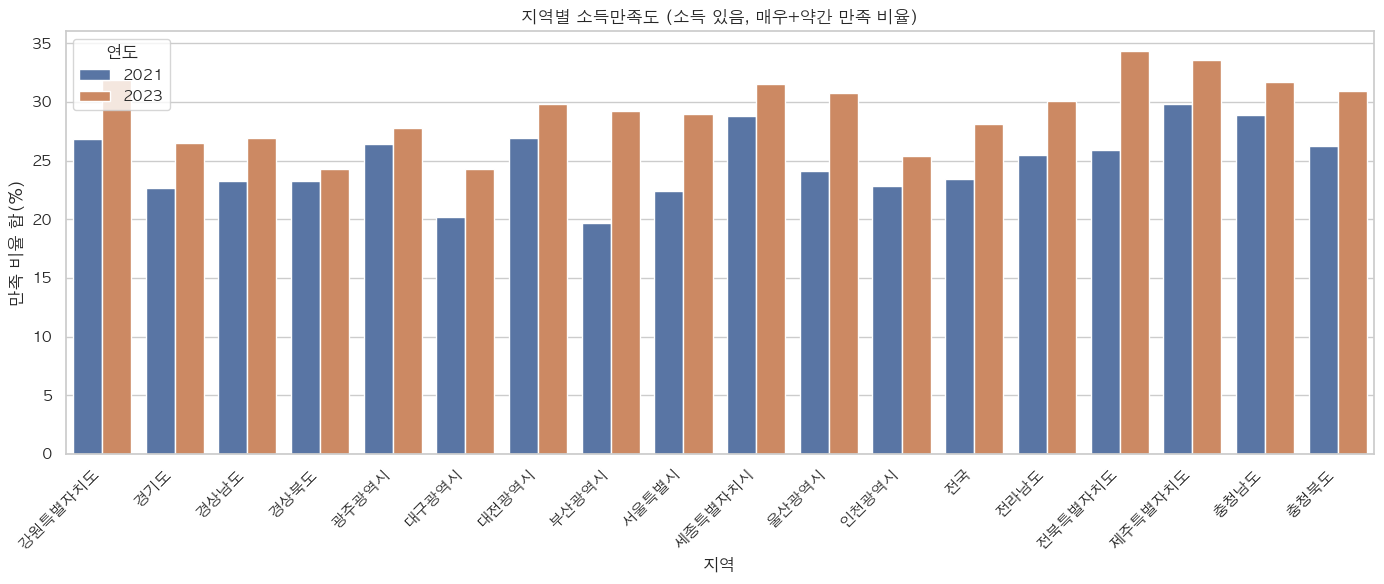

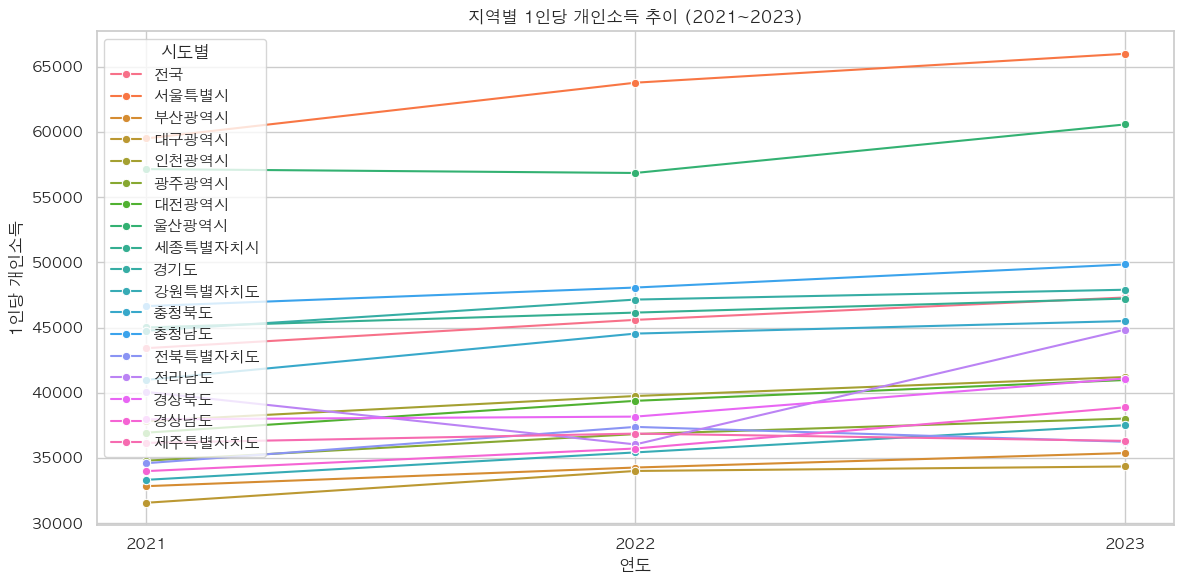

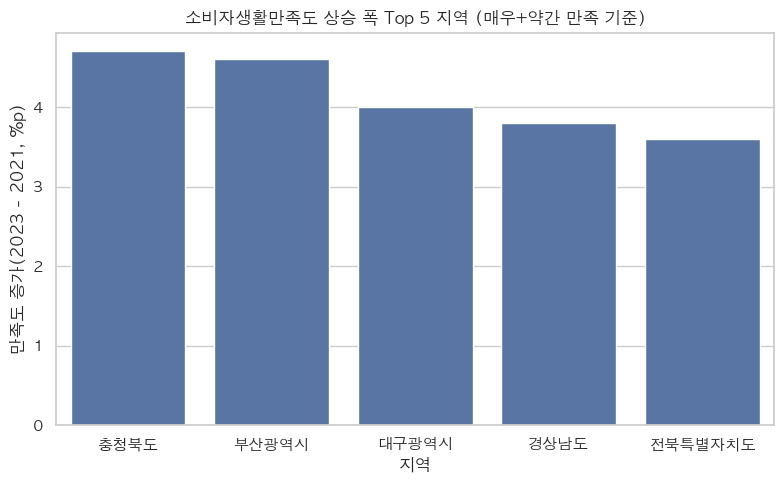

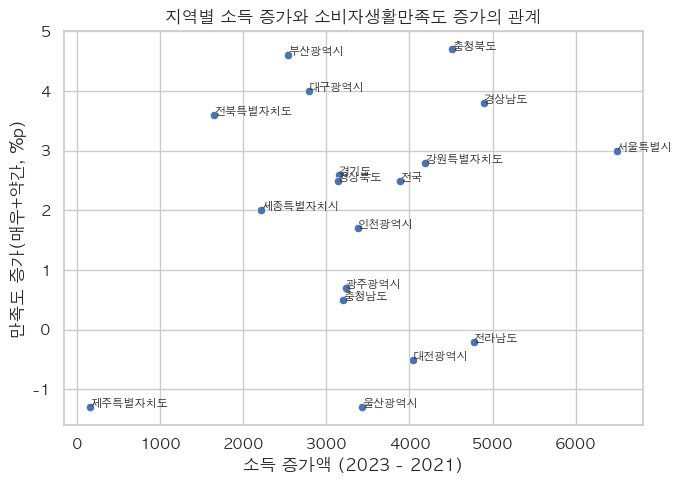

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # Mac의 경우
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=font_prop.get_name())
# -----------------------------
# 1. 데이터 로드
# -----------------------------
life = pd.read_csv('../data/Consumer_Life.csv')
income_satis = pd.read_csv('../data/income_satisfaction.csv')
personal = pd.read_csv('../data/personal_income.csv')

# -----------------------------
# 2. 소비자생활만족도 전처리 (life)
#    - 0번째 행에 '계, 매우만족...' 이런 라벨이 들어있음
#    - 실제 데이터는 1행부터
# -----------------------------
life_value_cols = [c for c in life.columns if c.startswith('2021') or c.startswith('2023')]
life_label_map = {c: life.loc[0, c] for c in life_value_cols}  # 각 컬럼의 만족도 이름

life_data = life.iloc[1:].copy()  # 실제 데이터만

life_melt = pd.melt(
    life_data,
    id_vars=['행정구역별(1)', '특성별(1)', '특성별(2)'],
    value_vars=life_value_cols,
    var_name='항목',
    value_name='값'
)

life_melt['값'] = pd.to_numeric(life_melt['값'], errors='coerce')
life_melt['연도'] = life_melt['항목'].str.extract(r'(2021|2023)', expand=False)
life_melt['라벨'] = life_melt['항목'].map(life_label_map)

# -----------------------------
# 3. 소득만족도 전처리 (income_satisfaction)
#    - 마찬가지로 0번째 행에 라벨이 들어있음
# -----------------------------
income_value_cols = [c for c in income_satis.columns if c.startswith('2021') or c.startswith('2023')]
income_label_map = {c: income_satis.loc[0, c] for c in income_value_cols}

income_data = income_satis.iloc[1:].copy()

income_melt = pd.melt(
    income_data,
    id_vars=['행정구역별(1)', '특성별(1)', '특성별(2)'],
    value_vars=income_value_cols,
    var_name='항목',
    value_name='값'
)
income_melt['값'] = pd.to_numeric(income_melt['값'], errors='coerce')
income_melt['연도'] = income_melt['항목'].str.extract(r'(2021|2023)', expand=False)
income_melt['라벨'] = income_melt['항목'].map(income_label_map)

# -----------------------------
# 4. 개인소득 전처리 (personal_income)
#    - 2021, 2022, 2023 p)만 사용
# -----------------------------
personal_21_23 = personal[['시도별', '2021', '2022', '2023 p)']].copy()
personal_21_23 = personal_21_23.rename(columns={'2023 p)': '2023'})

personal_long = pd.melt(
    personal_21_23,
    id_vars=['시도별'],
    var_name='연도',
    value_name='개인소득'
)

# ============================================================
# 그래프 1 : 전국 소비자생활만족도 분포 (2021 vs 2023)
# ============================================================
cond_nat = (
    (life_melt['행정구역별(1)'] == '전국') &
    (life_melt['특성별(1)'] == '전체') &
    (life_melt['특성별(2)'] == '계') &
    (life_melt['라벨'].isin(['매우 만족', '약간 만족', '보통', '약간 불만족', '매우 불만족']))
)

life_nat = life_melt[cond_nat]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=life_nat,
    x='라벨', y='값', hue='연도'
)
plt.title('전국 소비자생활만족도 분포 (2021 vs 2023)')
plt.xlabel('만족도')
plt.ylabel('비율(%)')
plt.tight_layout()
plt.show()

# ============================================================
# 그래프 2 : 성별 소비자생활만족도 (만족=매우+약간) 변화 (전국 기준)
# ============================================================
cond_gender = (
    (life_melt['행정구역별(1)'] == '전국') &
    (life_melt['특성별(1)'] == '성별') &
    (life_melt['라벨'].isin(['매우 만족', '약간 만족']))
)

gender_sat = life_melt[cond_gender]

# 성별(남/여), 연도별로 "매우+약간 만족" 합산
gender_sum = (
    gender_sat
    .groupby(['특성별(2)', '연도'])['값']
    .sum()
    .reset_index()
    .rename(columns={'특성별(2)': '성별'})
)

plt.figure(figsize=(6, 5))
sns.barplot(
    data=gender_sum,
    x='성별', y='값', hue='연도'
)
plt.title('성별 소비자생활만족도 (매우+약간 만족 비율, 전국)')
plt.xlabel('성별')
plt.ylabel('만족 비율 합(%)')
plt.tight_layout()
plt.show()

# ============================================================
# 그래프 3 : 지역별 소득만족도 (소득 있음 기준, 매우+약간 만족)
# ============================================================
# income_melt에서 전체/계 + 만족도 항목만 사용
cond_income_region = (
    (income_melt['특성별(1)'] == '전체') &
    (income_melt['특성별(2)'] == '계') &
    (income_melt['라벨'].isin(['- 매우 만족', '- 약간 만족']))
)

income_region = income_melt[cond_income_region]

# 지역·연도별로 "소득 만족도 (매우+약간)" 합산
income_region_sum = (
    income_region
    .groupby(['행정구역별(1)', '연도'])['값']
    .sum()
    .reset_index()
    .rename(columns={'값': '만족비율'})
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=income_region_sum,
    x='행정구역별(1)', y='만족비율', hue='연도'
)
plt.xticks(rotation=45, ha='right')
plt.title('지역별 소득만족도 (소득 있음, 매우+약간 만족 비율)')
plt.xlabel('지역')
plt.ylabel('만족 비율 합(%)')
plt.tight_layout()
plt.show()

# ============================================================
# 그래프 4 : 지역별 1인당 개인소득 추이 (2021~2023)
# ============================================================
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=personal_long,
    x='연도', y='개인소득', hue='시도별', marker='o'
)
plt.title('지역별 1인당 개인소득 추이 (2021~2023)')
plt.xlabel('연도')
plt.ylabel('1인당 개인소득')
plt.tight_layout()
plt.show()

# ============================================================
# 그래프 5 : 지역별 소비자생활만족도 상승폭 (매우+약간 만족)
# ============================================================
# 지역별 (전체/계 기준) + 만족(매우+약간) 합
cond_region_life = (
    (life_melt['특성별(1)'] == '전체') &
    (life_melt['특성별(2)'] == '계') &
    (life_melt['라벨'].isin(['매우 만족', '약간 만족']))
)

life_region = life_melt[cond_region_life]

life_region_sum = (
    life_region
    .groupby(['행정구역별(1)', '연도'])['값']
    .sum()
    .reset_index()
)

life_region_pivot = life_region_sum.pivot(
    index='행정구역별(1)',
    columns='연도',
    values='값'
)

# 2021, 2023 둘 다 있는 지역만 사용
life_region_pivot = life_region_pivot.dropna(subset=['2021', '2023'])

life_region_pivot['만족증가'] = life_region_pivot['2023'] - life_region_pivot['2021']
life_region_pivot = life_region_pivot.sort_values('만족증가', ascending=False)

top5 = life_region_pivot.head(5).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top5,
    x='행정구역별(1)', y='만족증가'
)
plt.title('소비자생활만족도 상승 폭 Top 5 지역 (매우+약간 만족 기준)')
plt.xlabel('지역')
plt.ylabel('만족도 증가(2023 - 2021, %p)')
plt.tight_layout()
plt.show()

# ============================================================
# 그래프 6 : 소득 증가 vs 만족도 증가 (지역별 상관관계)
# ============================================================
# 소득 증가(2023 - 2021)
inc_growth = personal_21_23.copy()
inc_growth = inc_growth.rename(columns={'시도별': '행정구역별(1)'})
inc_growth['소득증가'] = inc_growth['2023'] - inc_growth['2021']
inc_growth = inc_growth.set_index('행정구역별(1)')

# 앞에서 만든 life_region_pivot의 만족증가와 결합
corr_df = inc_growth[['소득증가']].join(life_region_pivot[['만족증가']], how='inner')

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=corr_df,
    x='소득증가', y='만족증가'
)
for name, row in corr_df.iterrows():
    plt.text(row['소득증가'], row['만족증가'], name, fontsize=8)

plt.title('지역별 소득 증가와 소비자생활만족도 증가의 관계')
plt.xlabel('소득 증가액 (2023 - 2021)')
plt.ylabel('만족도 증가(매우+약간, %p)')
plt.tight_layout()
plt.show()


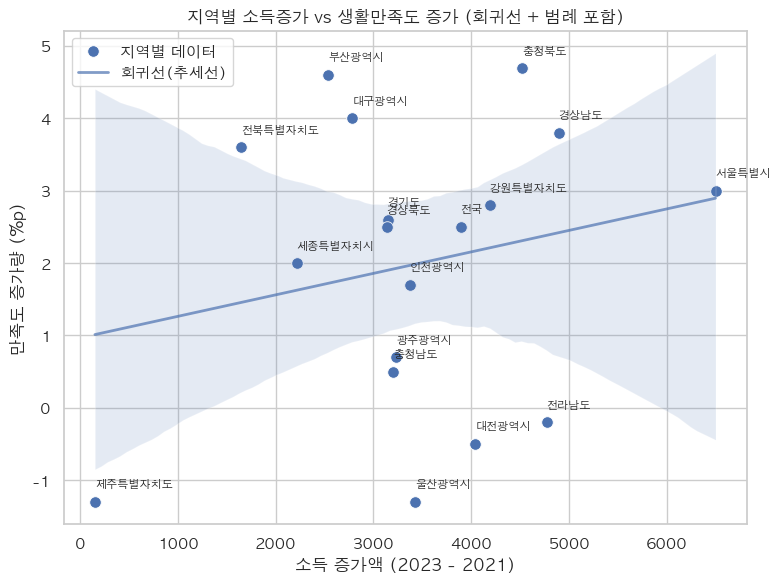

📌 상관계수 r = 0.213
📌 p-value = 0.39577990024561627


In [26]:

from scipy.stats import pearsonr

# corr_df: '소득증가', '만족증가' 컬럼 보유한 DF

# 상관계수
corr, p_value = pearsonr(corr_df['소득증가'], corr_df['만족증가'])

# -------------------------
# 회귀선 + 산점도 + 범례 포함 그래프
# -------------------------
plt.figure(figsize=(8, 6))

# 1) 산점도
sns.scatterplot(
    data=corr_df,
    x='소득증가',
    y='만족증가',
    s=70,
    label='지역별 데이터'
)

# 2) 회귀선 (lineplot)
sns.regplot(
    data=corr_df,
    x='소득증가',
    y='만족증가',
    scatter=False,
    label='회귀선(추세선)',
    line_kws={'linewidth': 2, 'alpha': 0.7}
)

# 3) 점 옆에 지역명 라벨 표시
for region, row in corr_df.iterrows():
    plt.text(row['소득증가'] + 0.2,
             row['만족증가'] + 0.2,
             region,
             fontsize=8)

plt.title('지역별 소득증가 vs 생활만족도 증가 (회귀선 + 범례 포함)')
plt.xlabel('소득 증가액 (2023 - 2021)')
plt.ylabel('만족도 증가량 (%p)')
plt.legend()
plt.tight_layout()
plt.show()

print("📌 상관계수 r =", round(corr, 3))
print("📌 p-value =", p_value)



🎯 1. 상관계수 해석 (r = 0.213)
✔ r = 0.21 → “약한 양의 상관관계”

0.2 근처는 보통 **‘거의 관련 없음’ 또는 ‘아주 약한 관련’**으로 본다.

즉 소득이 오른 지역이 만족도가 오르긴 했지만

일관적이고 강력한 패턴은 아니다.

🎯 2. p-value 해석 (p = 0.3957)
✔ p = 0.39 → “통계적으로 유의미하지 않음”

기준: p < 0.05여야 “유의미한 통계적 관계”라고 말할 수 있음.

p = 0.39 는 상관관계가 우연히 발생했을 가능성이 매우 높음을 뜻함.

➡ 즉, 관찰된 r=0.21은 통계적으로 의미 없는 수치다.

🎤 "지역별 소득 증가가 소비자 생활만족도 증가를 설명한다고 볼 수 없다."

더 정확히는:

소득이 오른 지역이 만족도가 함께 올라가는 경향은 약하게는 존재하나,

그 경향은 매우 미약하고,

통계적으로도 유효하지 않다(p > 0.05).

즉 소득 증가는 생활만족도 향상에 큰 영향 요인이 아니다.

📌 지역별 소득 증가와 소득 만족도 증가의 상관계수: 0.013
📌 p-value: 0.9580745753263935


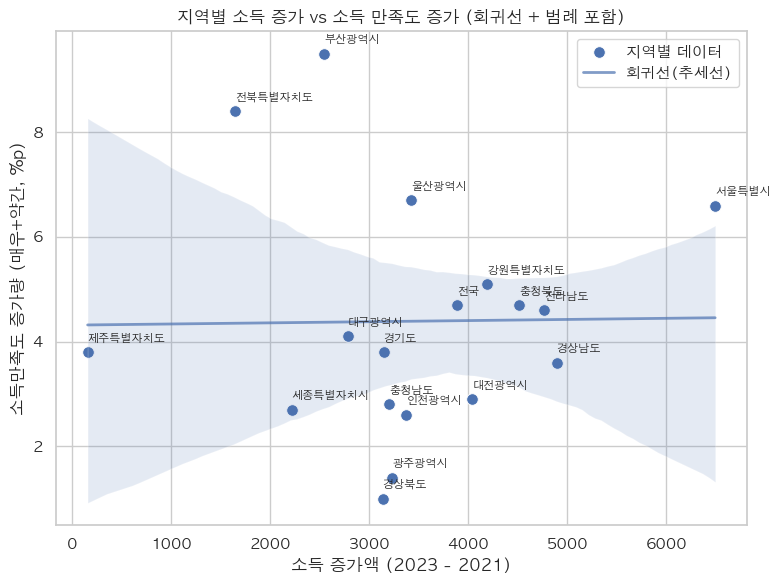

In [27]:
from scipy.stats import pearsonr

# -------------------------------------------------------------------
# 1. 지역별 소득 증가 계산 (personal_income 기반)
# -------------------------------------------------------------------
inc_growth = personal_21_23.copy()
inc_growth = inc_growth.rename(columns={'시도별': '행정구역별(1)'})
inc_growth['소득증가'] = inc_growth['2023'] - inc_growth['2021']
inc_growth = inc_growth.set_index('행정구역별(1)')

# -------------------------------------------------------------------
# 2. 지역별 "소득 만족도(매우+약간)" 증가 계산 (income_melt 기반)
# -------------------------------------------------------------------

# income_melt에서 전체/계 + 매우만족·약간만족만 사용
cond_income_region = (
    (income_melt['특성별(1)'] == '전체') &
    (income_melt['특성별(2)'] == '계') &
    (income_melt['라벨'].isin(['- 매우 만족', '- 약간 만족']))
)

income_region = income_melt[cond_income_region]

# 지역·연도별 (매우+약간) 합산
income_region_sum = (
    income_region
    .groupby(['행정구역별(1)', '연도'])['값']
    .sum()
    .reset_index()
)

# pivot: 각 지역의 2021, 2023 비교
income_region_pivot = income_region_sum.pivot(
    index='행정구역별(1)',
    columns='연도',
    values='값'
)

# 두 연도 모두 있는 지역만 사용
income_region_pivot = income_region_pivot.dropna(subset=['2021', '2023'])

# 소득 만족도 증가량 계산
income_region_pivot['소득만족증가'] = income_region_pivot['2023'] - income_region_pivot['2021']

# -------------------------------------------------------------------
# 3. 두 데이터를 merge
# -------------------------------------------------------------------
corr_df2 = inc_growth[['소득증가']].join(
    income_region_pivot[['소득만족증가']],
    how='inner'
)

# -------------------------------------------------------------------
# 4. 상관계수 계산
# -------------------------------------------------------------------
corr, p_value = pearsonr(corr_df2['소득증가'], corr_df2['소득만족증가'])
print("📌 지역별 소득 증가와 소득 만족도 증가의 상관계수:", round(corr, 3))
print("📌 p-value:", p_value)

# -------------------------------------------------------------------
# 5. 시각화: 회귀선 + 산점도 + 지역명 + 범례
# -------------------------------------------------------------------
plt.figure(figsize=(8, 6))

# 산점도
sns.scatterplot(
    data=corr_df2,
    x='소득증가', y='소득만족증가',
    s=70,
    label='지역별 데이터'
)

# 회귀선
sns.regplot(
    data=corr_df2,
    x='소득증가', y='소득만족증가',
    scatter=False,
    label='회귀선(추세선)',
    line_kws={'linewidth': 2, 'alpha': 0.7}
)

# 라벨 (지역명)
for region, row in corr_df2.iterrows():
    plt.text(
        row['소득증가'] + 0.2,
        row['소득만족증가'] + 0.2,
        region,
        fontsize=8
    )

plt.title('지역별 소득 증가 vs 소득 만족도 증가 (회귀선 + 범례 포함)')
plt.xlabel('소득 증가액 (2023 - 2021)')
plt.ylabel('소득만족도 증가량 (매우+약간, %p)')
plt.legend()
plt.tight_layout()
plt.show()


🎤 “지역별 소득 증가와 소득 만족도 증가는 상관관계가 없다.”

정확하게는:

소득이 오른 지역이라고 해서
소득 만족도(매우+약간)가 오르지 않았다.

소득이 덜 오른 지역도
소득 만족도가 오를 수도 있고 떨어질 수도 있다.

즉, 소득 수준의 증가 자체는 소득 만족도를 설명할 수 없다.

“지역별 2021~2023년 소득 증가액과 ‘소득 있음 기준 매우만족+약간만족 비율’의 증가량 간 상관분석 결과, 상관계수는 0.013, p-value는 0.958로 나타났다. 이는 두 변수 간에 사실상 어떠한 선형 관계도 존재하지 않으며, 통계적으로도 **유의미한 상관관계가 전혀 없다(p > 0.05)**는 것을 의미한다.

즉, 지역의 소득 증가가 곧 소득 만족도 향상으로 이어진다고 보기 어렵다. 오히려 물가, 주거비, 지역 서비스 수준 등의 비경제적 요인이 소득 만족도에 더 큰 영향을 주는 것으로 해석된다.”